In [1]:
%env CUDA_VISIBLE_DEVICES=2

import json
from IPython.core.display import Image, display

with open('/home/xilini/par-gen/01-par-gen/data/dataset_paragraphs_v1.json', 'r') as p:
    paragraphs = json.load(p)['images']
    
val_paragraphs = [elem for elem in paragraphs if elem['split'] == 'test']

env: CUDA_VISIBLE_DEVICES=2


In [3]:
# BASE

with open('./scores/VISUAL-beam_2_cidertest.json', 'r') as f:
    VISUAL = json.load(f)
with open('./scores/LANGUAGE-beam_2_cidertest.json', 'r') as f:
    LANGUAGE = json.load(f)
with open('./scores/VISUAL_ATTENTION-beam_2_cidertest.json', 'r') as f:
    VISUAL_ATTENTION = json.load(f)
with open('./scores/LANGUAGE_ATTENTION-beam_2_cidertest.json', 'r') as f:
    LANGUAGE_ATTENTION = json.load(f)
with open('./scores/VISUAL_LANGUAGE-beam_2_cidertest.json', 'r') as f:
    VISUAL_LANGUAGE = json.load(f)
with open('./scores/VISUAL_LANG_ATTENTION_NOFUSION-beam_2_cidertest.json', 'r') as f:
    VISUAL_LANGUAGE_ATTENTION = json.load(f)

In [4]:
def show_image(image_id):
    vis_data_basepath = '/home/xilini/vis-data/'
    filename = str(image_id) + '.jpg'
    print(filename)
    for item in val_paragraphs:
        if filename == item['filename']:
            return vis_data_basepath + item['filepath'] + '/' + item['filename']
    return 'Not Found'

In [ ]:
for ind, elem in enumerate(VISUAL):
    print(ind)
    display(Image(show_image(elem['image_id']),
                  width=300, unconfined=False))

In [35]:
n = 29

2345947.jpg


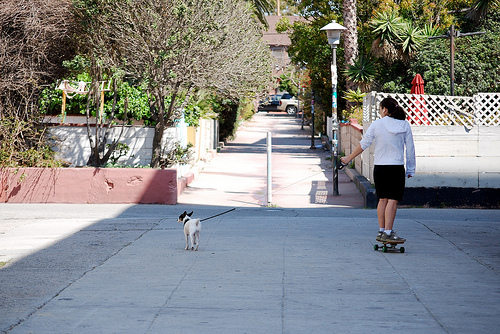

REF	 a woman is walking her dog. she is on a skateboard while she is holding the leash of her dog. she is wearing a gray hoodie and some black shorts.
HYP	 there is a woman sitting on a bench. the dog is brown and white. there are people sitting on the bench.



In [36]:
display(Image(show_image(VISUAL[n]['image_id']),
              width=300, unconfined=False))
print('REF\t', VISUAL[n]['references'])
print('HYP\t', VISUAL[n]['hypotheses'])
print()

In [37]:
#display(Image(show_image(VISUAL_ATTENTION[n]['image_id']),
#              width=300, unconfined=False))
#print('REF\t', VISUAL_ATTENTION[n]['references'])
print('HYP\t', VISUAL_ATTENTION[n]['hypotheses'])
print()

HYP	 a person is standing on top of a skateboard. she is wearing a white tank top. the person is wearing a blue shirt.



In [38]:
#display(Image(show_image(LANGUAGE[n]['image_id']),
#              width=300, unconfined=False))
#print('REF\t', LANGUAGE[n]['references'])
print('HYP\t', LANGUAGE[n]['hypotheses'])
print()

HYP	 a man is riding on a bench. the skateboard is white. the man is wearing a black hat.



In [39]:
#display(Image(show_image(LANGUAGE_ATTENTION[n]['image_id']),
#              width=300, unconfined=False))
#print('REF\t', LANGUAGE_ATTENTION[n]['references'])
print('HYP\t', LANGUAGE_ATTENTION[n]['hypotheses'])
print()

HYP	 a woman is riding a skateboard. she is wearing a white shirt. she is wearing a white shirt.



In [40]:
#display(Image(show_image(VISUAL_LANGUAGE[n]['image_id']),
#              width=300, unconfined=False))
#print('REF\t', VISUAL_LANGUAGE[n]['references'])
print('HYP\t', VISUAL_LANGUAGE[n]['hypotheses'])
print()

HYP	 a woman is sitting on a sidewalk. the woman is wearing a black shirt. the woman is wearing a white shirt.



In [41]:
#display(Image(show_image(VISUAL_LANGUAGE_ATTENTION[n]['image_id']),
#              width=300, unconfined=False))
#print('REF\t', VISUAL_LANGUAGE_ATTENTION[n]['references'])
print('HYP\t', VISUAL_LANGUAGE_ATTENTION[n]['hypotheses'])
print()

HYP	 a man is riding on a skateboard. the skateboard is black. the man is wearing a white helmet.



In [5]:
# check automatic diversity
with open('/home/xilini/DiversityMetrics/results/visual_language_mbleu.json', 'r') as f1:
    vl_div = json.load(f1)

In [6]:
curr_min_bleu1 = 0.50
image_ids = []
for image_id, bleu_values in vl_div.items():
    if bleu_values[0] < curr_min_bleu1:
        #print(bleu_values[0], curr_min_bleu1)
        #curr_min_bleu1 = bleu_values[0]
        image_ids.append(image_id)

In [7]:
curr_min_bleu1

0.5

In [8]:
for img in image_ids:
    print(img)
    print(vl_div[img])

2416722
[0.3466420721294916, 0.1666666696180145, 1.2565881927604311e-06, 3.5864210973394907e-09]
2392154
[0.3085503041126934, 7.468603008657064e-09, 2.3573764238424602e-11, 1.4336758861241776e-12]
2343025
[0.47500590580003244, 8.75797713093768e-09, 2.4884995048349534e-11, 1.4120824729066936e-12]
2326656
[0.37724647740803363, 0.163639897594146, 1.5276267991085266e-06, 5.077026726766582e-09]
2384003
[0.4812064679597731, 0.2274138118463155, 2.0781830088915298e-06, 6.8543791100984465e-09]
2326705
[0.4744136206728376, 0.3934472870264966, 0.2323401056846223, 3.852397063449994e-05]
2351302
[0.3321487629837058, 7.421230825210163e-09, 2.236110089104779e-11, 1.3054888151652967e-12]
2318537
[0.4732699600257217, 0.21110694381517647, 1.9800906279136287e-06, 6.6169322702704726e-09]
2352505
[0.40834514512185466, 0.18018215173230925, 1.5996059759043126e-06, 5.064193159792287e-09]
2343134
[0.4708673556834744, 0.2017116087996939, 0.1719502703238061, 3.1991127872557756e-05]
2318586
[0.2868626042766796, 6

2366928.jpg


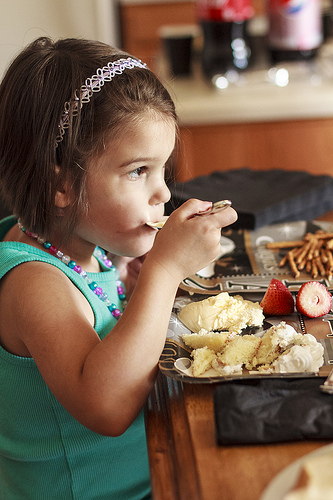

{'image_id': 2366928, 'references': 'a little girl is sitting down at the table eating. she has a blue shirt on. she seems to be eating cake with strawberries. the table is made of wood and its right next to the kitchen inside the house.', 'hypotheses': 'a man is sitting at a table. the woman is wearing a blue shirt. she has blonde hair. the woman is wearing glasses.'}


In [13]:
for item in VISUAL_LANGUAGE:
    if item['image_id'] == 2366928:
        display(Image(show_image(item['image_id'])))
        print(item)

In [ ]:
with open('/home/xilini/DiversityMetrics/results/gts_mbleu.json', 'r') as gts:
    gts = json.load(gts)

In [ ]:
# GOOD IMAGES (moderate mbleu scores)
# 2400912, 2397433